In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('aiml')
jovian.set_colab_id('1ZGJsblNz9x-3DbddKJ-T9ywAsGHKkg3P')

# Question 1 :

## Use User Data set and show the accuracy through the SVM model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("C:/Users/Nisha/Downloads/data.csv - Sheet1.csv")

In [ ]:
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.shape


(400, 5)

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
updated_data = data.drop(["User ID"], axis=1)
updated_data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
gender = pd.get_dummies(data["Gender"])
gender.head()


,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
updated_data = updated_data.drop("Gender", axis=1)
updated_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
updated_data = updated_data.join(gender)


In [ ]:
updated_data.head()


,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [ ]:
X = updated_data.drop("Purchased", axis=1).values
y = updated_data.iloc[:,2].values


In [ ]:
print(X.shape, y.shape)


(400, 4) (400,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(300, 4) (100, 4) (300,) (100,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
sv_c = SVC(kernel="rbf",gamma=2**-2,random_state=42)
sv_c.fit(X_train, y_train)

SVC(gamma=0.25, random_state=42)

In [ ]:
ypred = sv_c.predict(X_test)

In [ ]:
accuracy_score(y_test, ypred)


0.94

In [ ]:
cm = confusion_matrix(y_test, ypred)
cm 

array([[59,  4],
       [ 2, 35]], dtype=int64)

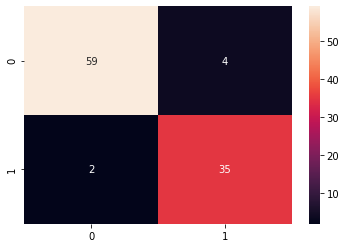

In [ ]:
sns.heatmap(cm, annot=True)
